In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, DataFrame

In [11]:
df = read_csv('stan_results/2pl_ex_m3_summary.tsv', sep='\t', index_col=0)
data = read_csv('data/data.csv')

In [12]:
alpha_pr = df.T.filter(regex='alpha').T['Mean'].values.reshape(4,-1).T
mask = np.where(data.pivot_table('trial','item','shape_set').notnull(), 1, np.nan)
a1 = np.column_stack([alpha_pr @ [1,0,0,0], alpha_pr @ [1,0,1,0], alpha_pr @ [1,0,0,1]])
a2 = np.column_stack([alpha_pr @ [1,1,0,0], alpha_pr @ [1,1,1,0], alpha_pr @ [1,1,0,1]])
a = np.exp(DataFrame(np.column_stack([np.nansum(a1 * mask, axis=1), np.nansum(a2 * mask, axis=1)])) / 2)

In [13]:
beta = df.T.filter(regex='beta').T['Mean'].values.reshape(4,-1).T
mask = np.where(data.pivot_table('trial','item','shape_set').notnull(), 1, np.nan)
b1 = np.column_stack([beta @ [1,0,0,0], beta @ [1,0,1,0], beta @ [1,0,0,1]])
b2 = np.column_stack([beta @ [1,1,0,0], beta @ [1,1,1,0], beta @ [1,1,0,1]])
b = DataFrame(np.column_stack([np.nansum(b1 * mask, axis=1), np.nansum(b2 * mask, axis=1)])) / 2

<AxesSubplot:xlabel='0', ylabel='0'>

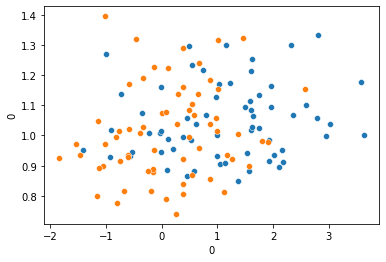

In [14]:
sns.scatterplot(x=b[0], y=a[0])
sns.scatterplot(x=b[1], y=a[1])

<AxesSubplot:>

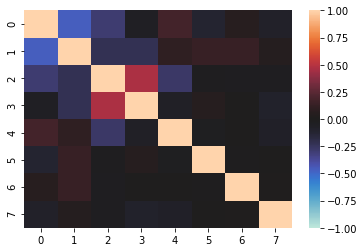

In [15]:
sns.heatmap(df.T.filter(regex='Corr').T['Mean'].values.reshape(8,8), vmin=-1, vmax=1, center=0)